In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Dataset\\Engineered\\online_shoppers_intention_Engineered.csv")

df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

   DislikeRates   TimeSpent  
0         100.0    0.000000  
1          25.0   64.000000  
2         100.0    0.000000  
3          47.5    2.666667  
4          17.5  627.500000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           2.124006      2.357097      3.147364      4.069586   
std            0.911325      1.717277      2.401591      4.025169   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      2.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

       DislikeRates     TimeSpent  
count  12330.000000  12330.000000  
mean      16.316045   1310.037228  
std       23.737475   2037.801702  
min        0.000000      0.000000  
25%        3.953208    222.000000  
50%        7.925522    680.000000  
75%       16.270863   1626.908333  
max      100.000000  69921.647230

In [5]:
drop_features_duration = []
drop_features_rates = ["BounceRates", "ExitRates"]

for column in df.columns:
    if "_Duration" in column:
        drop_features_duration.append(column)
    
df = df.drop(columns=drop_features_duration)
df = df.drop(columns=drop_features_rates)

In [6]:
df.head()

Administrative  Informational  ProductRelated  PageValues  SpecialDay  \
0               0              0               1         0.0         0.0   
1               0              0               2         0.0         0.0   
2               0              0               1         0.0         0.0   
3               0              0               2         0.0         0.0   
4               0              0              10         0.0         0.0   

  Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0   Feb                 1        1       1            1  Returning_Visitor   
1   Feb                 2        2       1            2  Returning_Visitor   
2   Feb                 4        1       9            3  Returning_Visitor   
3   Feb                 3        2       2            4  Returning_Visitor   
4   Feb                 3        3       1            4  Returning_Visitor   

   Weekend  Revenue  DislikeRates   TimeSpent  
0    False    False         100.0    0.000000  
1    False    False          25.0   64.000000  
2    False    False         100.0    0.000000  
3    False    False          47.5    2.666667  
4     True    False          17.5  627.500000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  int64  
 1   Informational     12330 non-null  int64  
 2   ProductRelated    12330 non-null  int64  
 3   PageValues        12330 non-null  float64
 4   SpecialDay        12330 non-null  float64
 5   Month             12330 non-null  object 
 6   OperatingSystems  12330 non-null  int64  
 7   Browser           12330 non-null  int64  
 8   Region            12330 non-null  int64  
 9   TrafficType       12330 non-null  int64  
 10  VisitorType       12330 non-null  object 
 11  Weekend           12330 non-null  bool   
 12  Revenue           12330 non-null  bool   
 13  DislikeRates      12330 non-null  float64
 14  TimeSpent         12330 non-null  float64
dtypes: bool(2), float64(4), int64(7), object(2)
memory usage: 1.2+ MB


In [8]:
#df["Month"] = df["Month"].astype('category')
#df["VisitorType"] = df["VisitorType"].astype('category')

In [9]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [10]:
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [11]:
df["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [12]:
object_features = []
bool_features = []

for column in df.columns:
    if df[column].dtype == "O":
        object_features.append(column)
    elif df[column].dtype == "bool":
        bool_features.append(column)
        
le = LabelEncoder()
        
for column in object_features:
    df[column] = le.fit_transform(df[column])
    
for column in bool_features:
    df[column] = le.fit_transform(df[column])

In [13]:
df["Month"].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [14]:
df["VisitorType"].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [15]:
df["Weekend"].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [16]:
df.head()

Administrative  Informational  ProductRelated  PageValues  SpecialDay  \
0               0              0               1         0.0         0.0   
1               0              0               2         0.0         0.0   
2               0              0               1         0.0         0.0   
3               0              0               2         0.0         0.0   
4               0              0              10         0.0         0.0   

   Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  \
0      2                 1        1       1            1            2   
1      2                 2        2       1            2            2   
2      2                 4        1       9            3            2   
3      2                 3        2       2            4            2   
4      2                 3        3       1            4            2   

   Weekend  Revenue  DislikeRates   TimeSpent  
0        0        0         100.0    0.000000  
1        0        0          25.0   64.000000  
2        0        0         100.0    0.000000  
3        0        0          47.5    2.666667  
4        1        0          17.5  627.500000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  int64  
 1   Informational     12330 non-null  int64  
 2   ProductRelated    12330 non-null  int64  
 3   PageValues        12330 non-null  float64
 4   SpecialDay        12330 non-null  float64
 5   Month             12330 non-null  int32  
 6   OperatingSystems  12330 non-null  int64  
 7   Browser           12330 non-null  int64  
 8   Region            12330 non-null  int64  
 9   TrafficType       12330 non-null  int64  
 10  VisitorType       12330 non-null  int32  
 11  Weekend           12330 non-null  int64  
 12  Revenue           12330 non-null  int64  
 13  DislikeRates      12330 non-null  float64
 14  TimeSpent         12330 non-null  float64
dtypes: float64(4), int32(2), int64(9)
memory usage: 1.3 MB


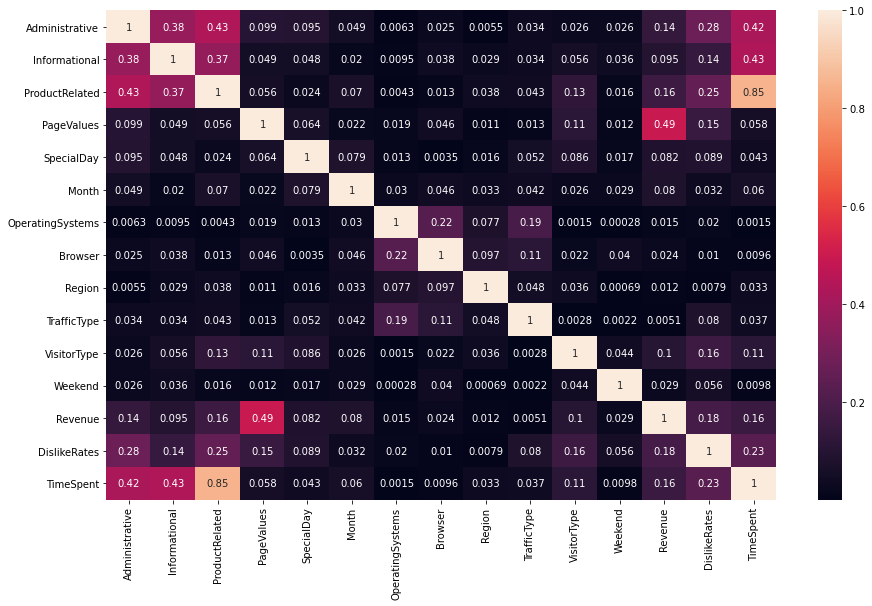

In [18]:
fig, ax = plt.subplots(figsize=(15,9))

sns.heatmap(abs(df.corr()), annot=True)

# Modelling

In [19]:
df_cluster = df.drop(columns=["Revenue"])

In [20]:
df_cluster.head()

Administrative  Informational  ProductRelated  PageValues  SpecialDay  \
0               0              0               1         0.0         0.0   
1               0              0               2         0.0         0.0   
2               0              0               1         0.0         0.0   
3               0              0               2         0.0         0.0   
4               0              0              10         0.0         0.0   

   Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  \
0      2                 1        1       1            1            2   
1      2                 2        2       1            2            2   
2      2                 4        1       9            3            2   
3      2                 3        2       2            4            2   
4      2                 3        3       1            4            2   

   Weekend  DislikeRates   TimeSpent  
0        0         100.0    0.000000  
1        0          25.0   64.000000  
2        0         100.0    0.000000  
3        0          47.5    2.666667  
4        1          17.5  627.500000

In [21]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  int64  
 1   Informational     12330 non-null  int64  
 2   ProductRelated    12330 non-null  int64  
 3   PageValues        12330 non-null  float64
 4   SpecialDay        12330 non-null  float64
 5   Month             12330 non-null  int32  
 6   OperatingSystems  12330 non-null  int64  
 7   Browser           12330 non-null  int64  
 8   Region            12330 non-null  int64  
 9   TrafficType       12330 non-null  int64  
 10  VisitorType       12330 non-null  int32  
 11  Weekend           12330 non-null  int64  
 12  DislikeRates      12330 non-null  float64
 13  TimeSpent         12330 non-null  float64
dtypes: float64(4), int32(2), int64(8)
memory usage: 1.2 MB


In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_cluster)
kmeans.score(df_cluster)

-6370236186.911444

In [23]:
score = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_cluster)
    score.append(kmeans.score(df_cluster))

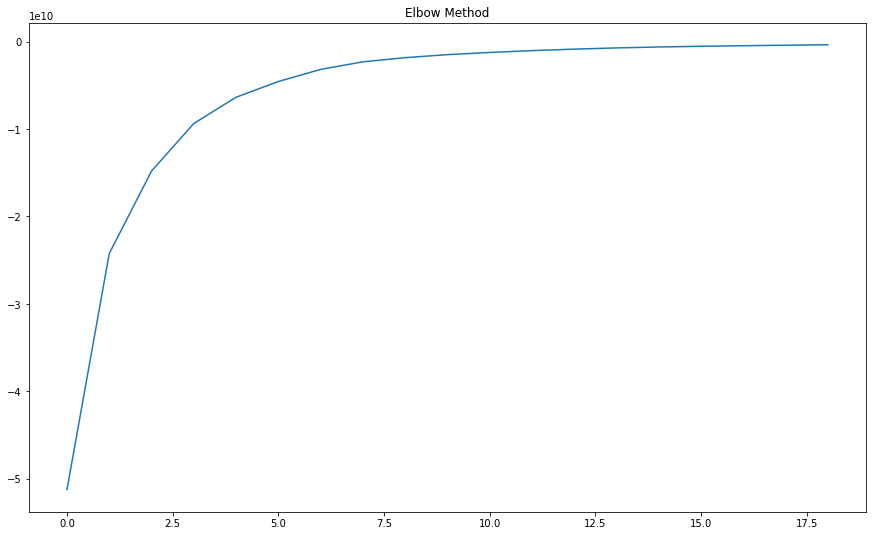

In [24]:
fig, ax = plt.subplots(figsize=(15, 9))

plt.plot(score)

plt.title("Elbow Method")

plt.show()

## KMeans Clustering 2

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_cluster)

KMeans(n_clusters=2, random_state=42)

In [27]:
df_cluster["Cluster"] = kmeans.labels_

In [28]:
df_cluster.head()

Administrative  Informational  ProductRelated  PageValues  SpecialDay  \
0               0              0               1         0.0         0.0   
1               0              0               2         0.0         0.0   
2               0              0               1         0.0         0.0   
3               0              0               2         0.0         0.0   
4               0              0              10         0.0         0.0   

   Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  \
0      2                 1        1       1            1            2   
1      2                 2        2       1            2            2   
2      2                 4        1       9            3            2   
3      2                 3        2       2            4            2   
4      2                 3        3       1            4            2   

   Weekend  DislikeRates   TimeSpent  Cluster  
0        0         100.0    0.000000        0  
1        0          25.0   64.000000        0  
2        0         100.0    0.000000        0  
3        0          47.5    2.666667        0  
4        1          17.5  627.500000        0

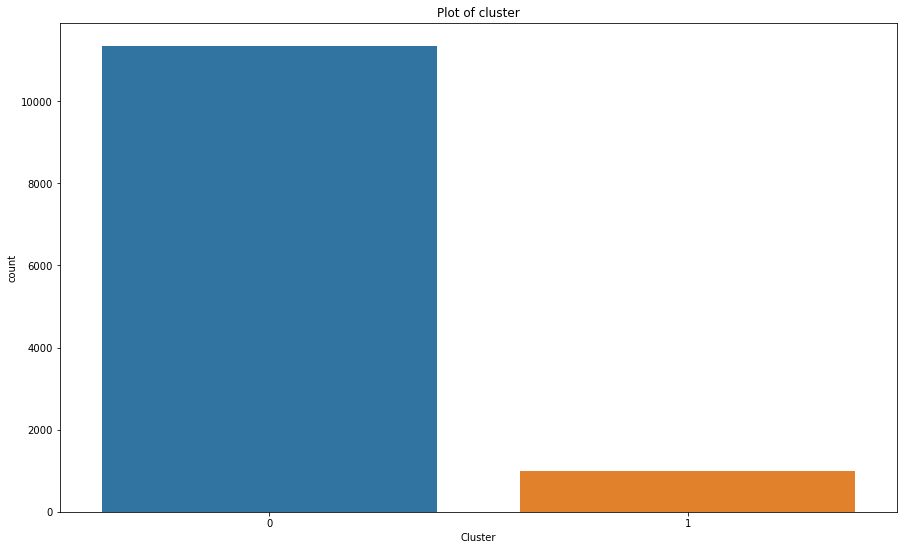

In [30]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df_cluster, x="Cluster")

plt.title("Plot of cluster")
plt.xlabel("Cluster")

plt.show()

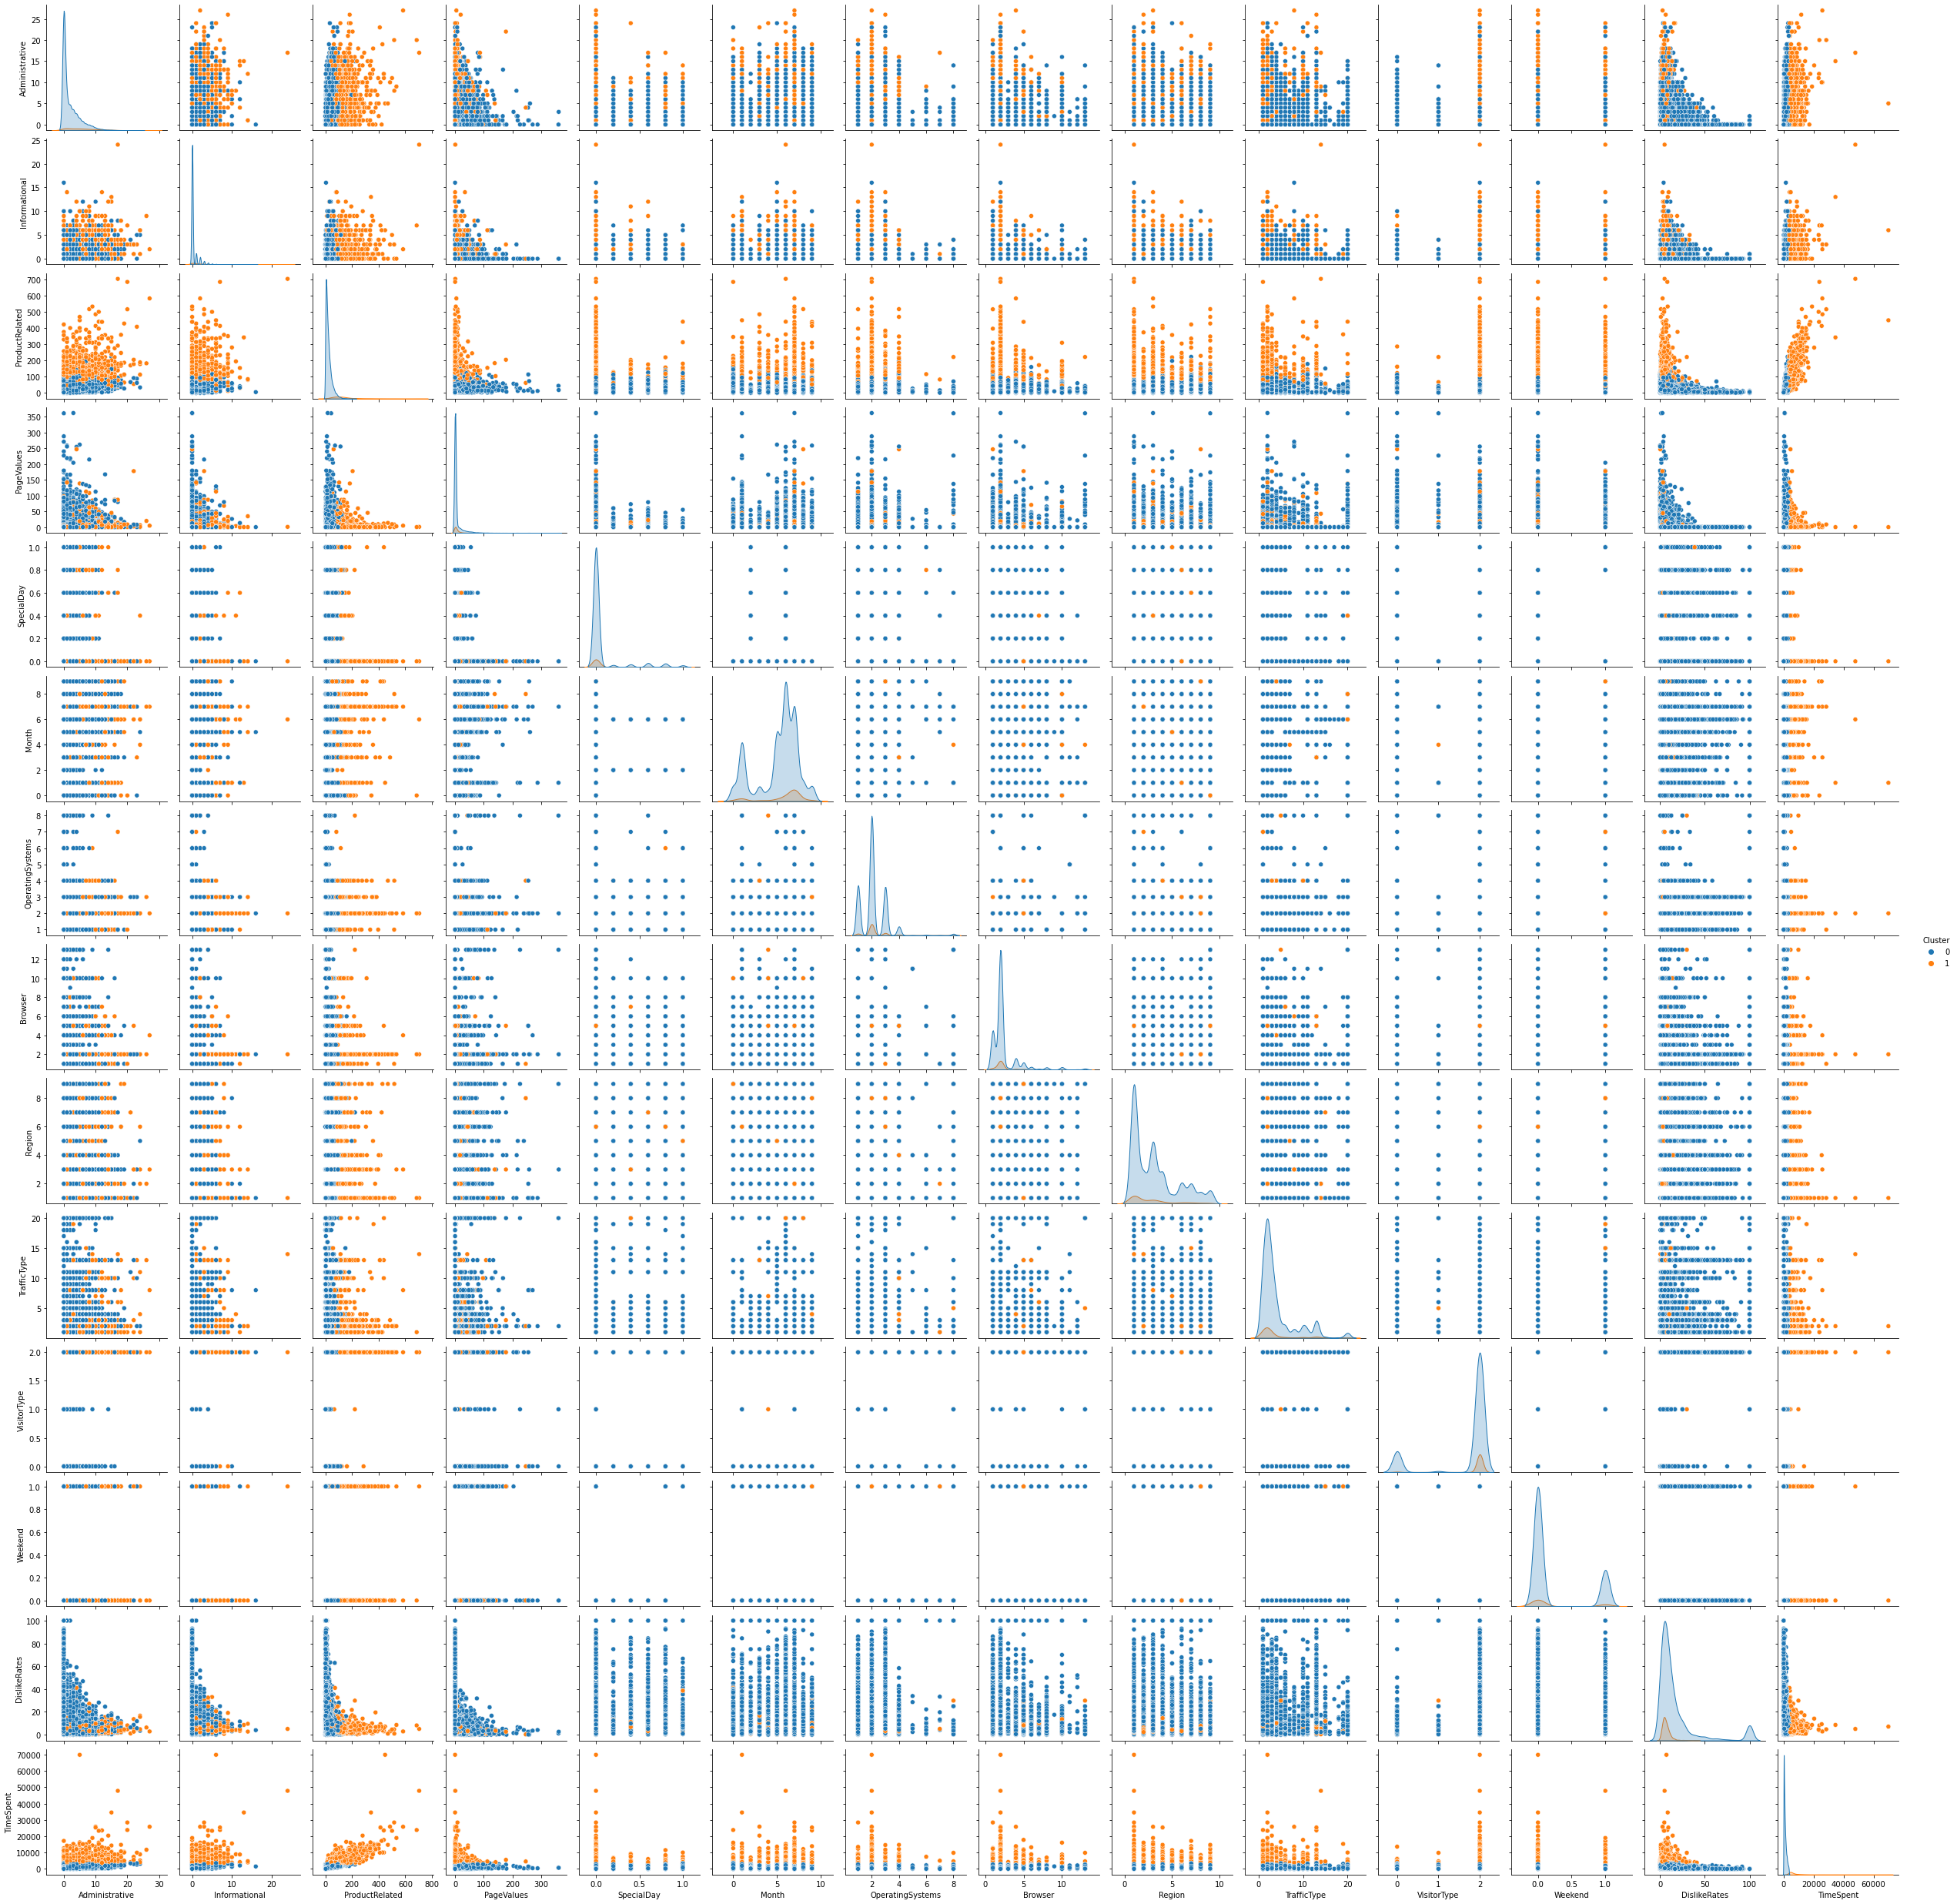

In [31]:
sns.pairplot(df_cluster, hue="Cluster", kind="scatter", palette="tab10")

# KMeans Clustering 5

In [33]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_cluster.drop(columns=["Cluster"]))

KMeans(n_clusters=5, random_state=42)

In [36]:
df_cluster["Cluster"] = kmeans.labels_

In [38]:
df_cluster.head()

Administrative  Informational  ProductRelated  PageValues  SpecialDay  \
0               0              0               1         0.0         0.0   
1               0              0               2         0.0         0.0   
2               0              0               1         0.0         0.0   
3               0              0               2         0.0         0.0   
4               0              0              10         0.0         0.0   

   Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  \
0      2                 1        1       1            1            2   
1      2                 2        2       1            2            2   
2      2                 4        1       9            3            2   
3      2                 3        2       2            4            2   
4      2                 3        3       1            4            2   

   Weekend  DislikeRates   TimeSpent  Cluster  
0        0         100.0    0.000000        0  
1        0          25.0   64.000000        0  
2        0         100.0    0.000000        0  
3        0          47.5    2.666667        0  
4        1          17.5  627.500000        0

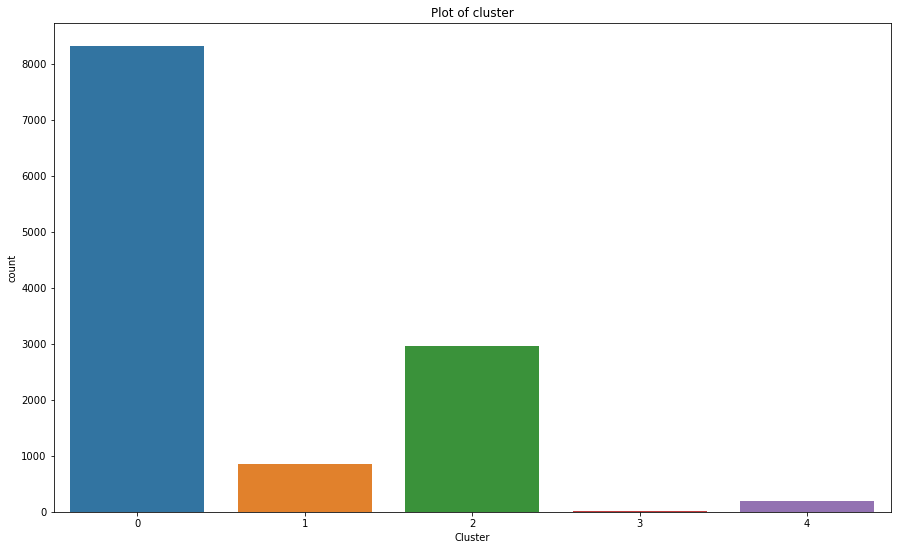

In [39]:
fig, ax = plt.subplots(figsize=(15, 9))

sns.countplot(data=df_cluster, x="Cluster")

plt.title("Plot of cluster")
plt.xlabel("Cluster")

plt.show()

C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Bina Umat\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


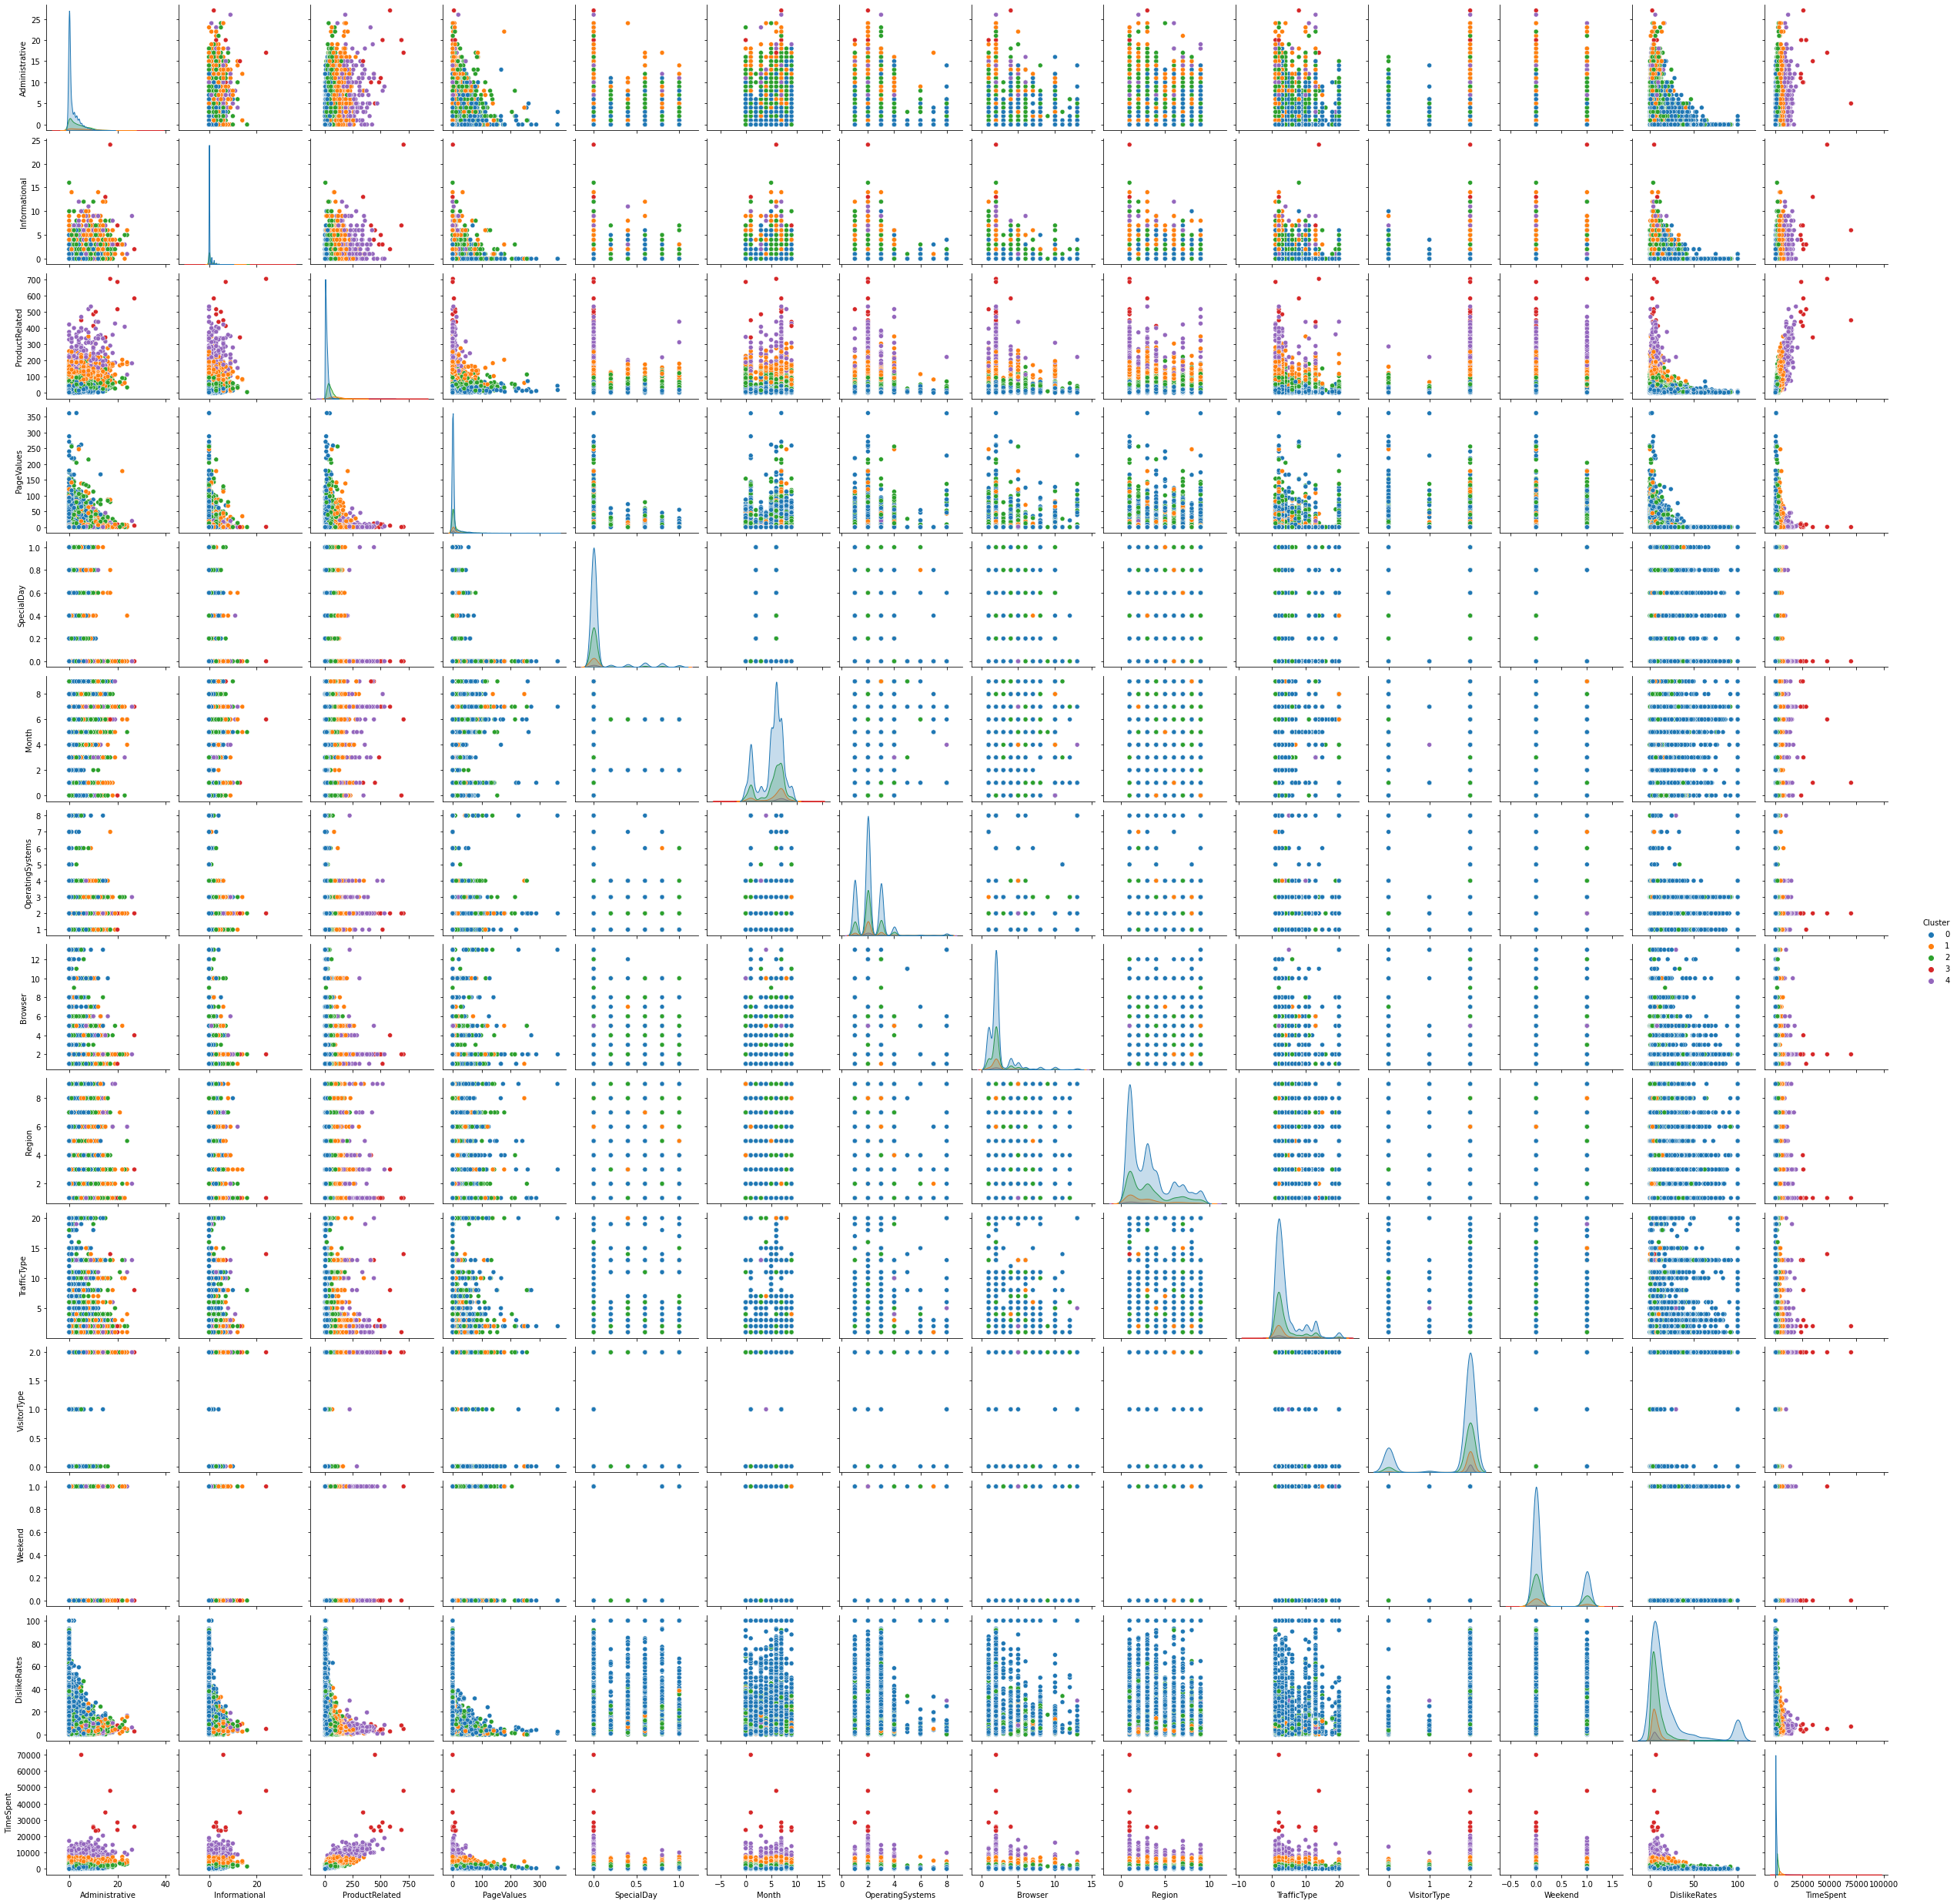

In [40]:
sns.pairplot(df_cluster, hue="Cluster", kind="scatter", palette="tab10")